Der Staatliche Pensionsfonds des Königreichs Norwegen (...) zählt (...) zu den zwei mit Abstand größten Staatsfonds der Welt. Mit dem Fonds sollen die staatlichen Öleinnahmen investiert werden, um für die Zeit vorzusorgen, in der die Erdölreserven der Nordsee zur Neige gehen. [Wikipedia]

### Teilaufgabe 1
Laden Sie die letzten fünf jährlichen Berichte (Investment Type: Equity) zur Fonds-Zusammensetzung im .xlsx-Format von der [Webseite des Pensionsfonds](https://www.nbim.no/en/investments/all-investments/#/) herunter und visualisieren Sie die zeitliche Entwicklung des Gesamtwerts der vom Fond gehaltenen Aktien je Industriesegment.


In [28]:
import pandas as pd

df_2020 = pd.read_excel("./datasets/EQ_2020_Country.xlsx")
df_2021 = pd.read_excel("./datasets/EQ_2021_Country.xlsx")
df_2022 = pd.read_excel("./datasets/EQ_2022_Country.xlsx")
df_2023 = pd.read_excel("./datasets/EQ_2023_Country.xlsx")
df_2024 = pd.read_excel("./datasets/EQ_2024_Country.xlsx")

df_2020["Year"] = 2020
df_2021["Year"] = 2021
df_2022["Year"] = 2022
df_2023["Year"] = 2023
df_2024["Year"] = 2024

df = pd.concat([df_2020, df_2021, df_2022, df_2023, df_2024], ignore_index=True)
df

,Region,Country,Name,Industry,Market Value(NOK),Market Value(USD),Voting,Ownership,Incorporation Country,Year
0,Oceania,Australia,A2B Australia Ltd,Industrials,5915559,690913,0.62,0.62,Australia,2020
1,Oceania,Australia,Abacus Property Group,Financials,124170407,14502585,0.81,0.81,Australia,2020
2,Oceania,Australia,Accent Group Ltd,Consumer Services,88333196,10316948,1.07,1.07,Australia,2020
3,Oceania,Australia,Adairs Ltd,Consumer Goods,63937438,7467626,1.73,1.73,Australia,2020
4,Oceania,Australia,Adbri Ltd,Industrials,108161795,12632846,0.75,0.75,Australia,2020
...,...,...,...,...,...,...,...,...,...,...
45202,Asia,Vietnam,Vietnam Technological & Commercial Joint Stock...,Financials,438963360,38650157,0.57,0.57,Vietnam,2024
45203,Asia,Vietnam,Viglacera Corp JSC,Industrials,37960578,3342380,0.42,0.42,Vietnam,2024
45204,Asia,Vietnam,Vincom Retail JSC,Consumer Discretionary,13290999,1170255,0.08,0.08,Vietnam,2024
45205,Asia,Vietnam,Vinh Hoan Corp,Consumer Staples,34151719,3007015,0.48,0.48,Vietnam,2024


In [26]:
grouped = df.groupby(["Year", "Industry"])
df_industryValPerYear = grouped["Market Value(USD)"].sum().reset_index()


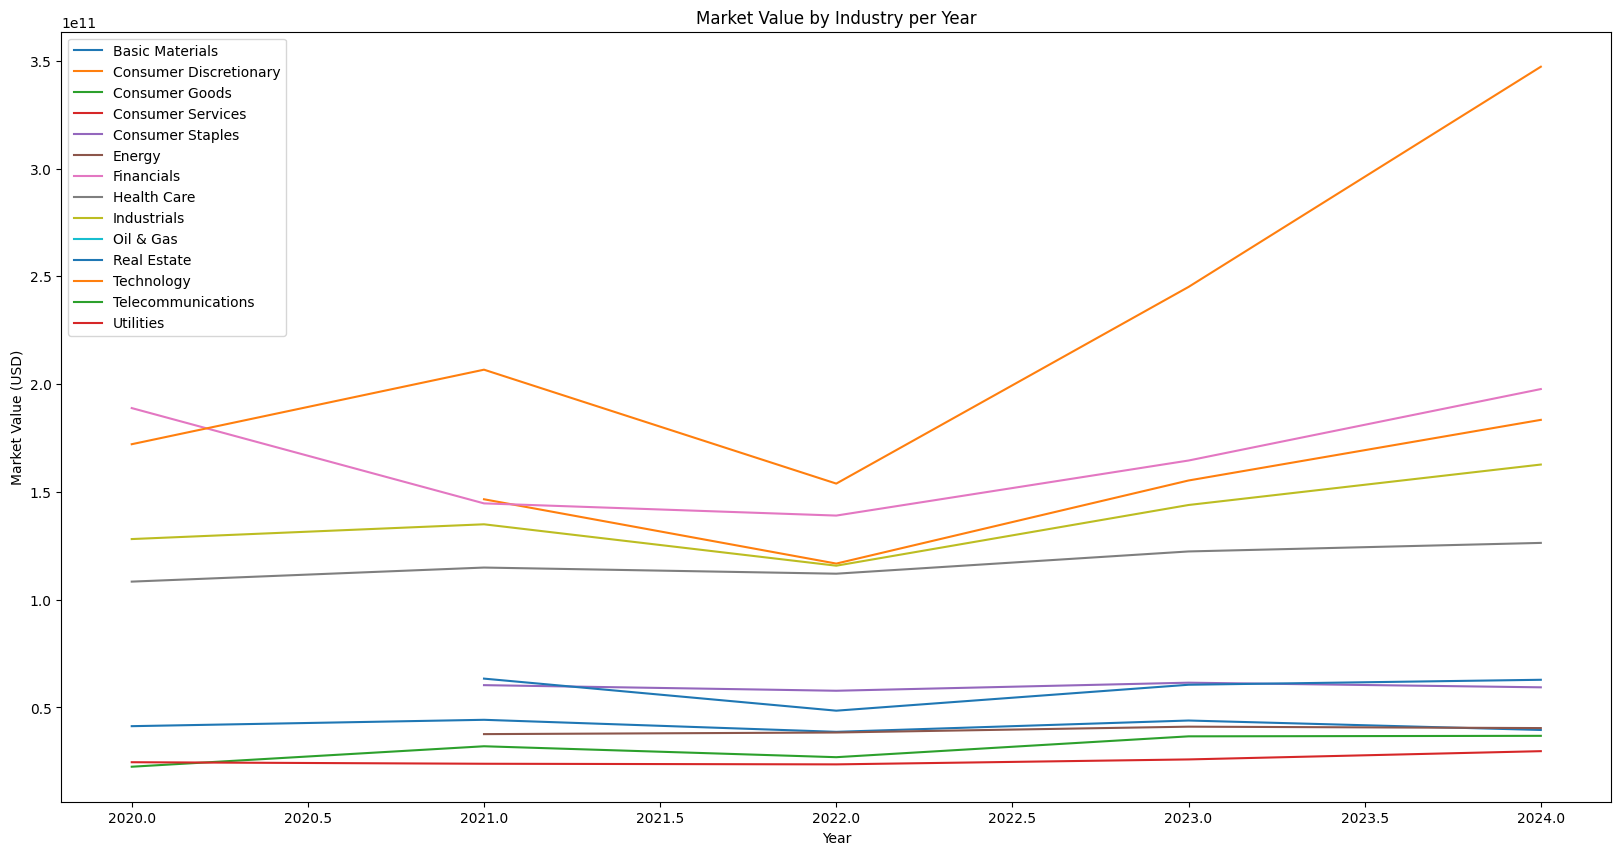

In [31]:
from matplotlib import pyplot as plt


fig, ax = plt.subplots(figsize=(20,10))

for label, df in df_industryValPerYear.groupby('Industry'):
	df.plot(x="Year", y="Market Value(USD)", ax=ax, label=label)
ax.set_title("Market Value by Industry per Year")
ax.set_xlabel("Year")
ax.set_ylabel("Market Value (USD)")
plt.legend()

### Teilaufgabe 2
Betrachten Sie nun das Industriesegment "Health Care".
Visualisieren Sie die zeitliche Entwicklung des Marktwerts der vom Fonds gehaltenen Anteile der drei Firmen, die im aktuellsten Bericht den größten Marktwert haben.
Ein Privatanleger unterstellt dem Management des Fonds nun eine überlegene Marktkenntnis und möchte eine gute Investment-Entscheidung (im Health Care-Bereich) fällen basierend auf den historischen Entscheidungen des Fonds. Empfehlen Sie dem Privatanleger eine Aktie basierend auf den vorliegenden Daten.